In [ ]:
##VERİ YÜKLEME VE TANIMA

import pandas as pd

dosya_adi = "Breast_cancer_dataset.csv"
df = pd.read_csv(dosya_adi)

print("İlk 10 veri: \n",df.head(10))
print("Toplam veri sayısı: ",df.shape)
print("Temel İstatistikler(max,min...): \n",df.describe())
target_column = 'diagnosis'
print("\nTümör Türü Maligant veya Benign (kötü huylu iyi huylu): \n",df[target_column].value_counts())

İlk 10 veri: 
          id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   
5    843786         M        12.45         15.70           82.57      477.1   
6    844359         M        18.25         19.98          119.60     1040.0   
7  84458202         M        13.71         20.83           90.20      577.9   
8    844981         M        13.00         21.82           87.50      519.8   
9  84501001         M        12.46         24.04           83.97      475.9   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760  

In [ ]:
## VERİ HAZIRLIĞI

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler

hedef_sutun_adi = 'diagnosis'

X = df.drop(hedef_sutun_adi, axis=1)
y = df[hedef_sutun_adi]

print("Özellikler (X) ilk 10 satır:")
print(X.head(10))
print("\nHedef Değişken (y) ilk 10 satır:")
print(y.head(10))
print("\nX'in şekli:", X.shape)
print("y'nin şekli:", y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

scaler = StandardScaler()
print("\nX_train şekli:", X_train.shape)
print("X_test şekli:", X_test.shape)
print("y_train şekli:", y_train.shape)
print("y_test şekli:", y_test.shape)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Özellikler (X) ilk 10 satır:
         id  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302        17.99         10.38          122.80     1001.0   
1    842517        20.57         17.77          132.90     1326.0   
2  84300903        19.69         21.25          130.00     1203.0   
3  84348301        11.42         20.38           77.58      386.1   
4  84358402        20.29         14.34          135.10     1297.0   
5    843786        12.45         15.70           82.57      477.1   
6    844359        18.25         19.98          119.60     1040.0   
7  84458202        13.71         20.83           90.20      577.9   
8    844981        13.00         21.82           87.50      519.8   
9  84501001        12.46         24.04           83.97      475.9   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760         0.30010              0.14710   
1          0.08474           0.07864         0.08690     

/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


Modelin Doğruluk Skoru: 0.9737

Confusion Matrix:
[[70  1]
 [ 2 41]]

Classification Report:
                precision    recall  f1-score   support

 İyi Huylu (B)       0.97      0.99      0.98        71
Kötü Huylu (M)       0.98      0.95      0.96        43

      accuracy                           0.97       114
     macro avg       0.97      0.97      0.97       114
  weighted avg       0.97      0.97      0.97       114



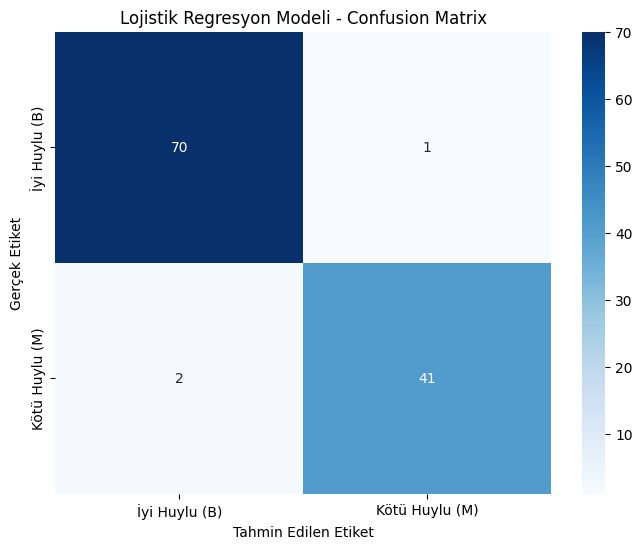

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Breast_cancer_dataset.csv')
df = df.drop(columns=['id', 'Unnamed: 32'])
X = df.drop(columns=['diagnosis'])
y = df['diagnosis'].map({'M': 1, 'B': 0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)



log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train_scaled, y_train)

y_pred = log_reg_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Modelin Doğruluk Skoru: {accuracy:.4f}")

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['İyi Huylu (B)', 'Kötü Huylu (M)']))


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['İyi Huylu (B)', 'Kötü Huylu (M)'],
            yticklabels=['İyi Huylu (B)', 'Kötü Huylu (M)'])
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.title('Lojistik Regresyon Modeli - Confusion Matrix')
plt.show()

Karar Ağaçları ilk 10 tahmin: [0 1 1 0 0 1 1 1 1 0]
Modelin Doğruluk Skoru: 0.9474

Confusion Matrix:
  TN FP
[[68  3]
 [ 3 40]]
  FN TP


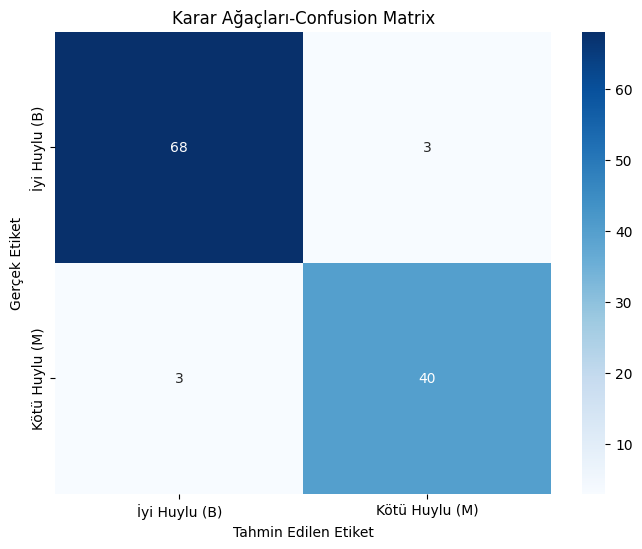

In [ ]:
## MODEL KURULUMU : Karar Ağaçları
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(max_depth=5,random_state=42)
model=dt_model
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

y_pred_dt = dt_model.predict(X_test)
print("Karar Ağaçları ilk 10 tahmin:", y_pred_dt[:10])


from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Modelin Doğruluk Skoru: {accuracy:.4f}")

from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

print("\nConfusion Matrix:")
print("  TN FP")
print(cm)
print("  FN TP")


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['İyi Huylu (B)', 'Kötü Huylu (M)'], yticklabels=['İyi Huylu (B)', 'Kötü Huylu (M)'])
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.title('Karar Ağaçları-Confusion Matrix')
plt.show()